In [2]:
# LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
train= pd.read_csv("housingtrain.csv")
test =pd.read_csv("housingtest.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [8]:
corr=train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


In [9]:
corr["SalePrice"]

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.341294
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.466386
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.474346
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
Name: SalePr

In [10]:
print(train.corr().abs().nlargest(6, 'SalePrice').index)
print(train.corr().abs().nlargest(6, 'SalePrice').values[:,37])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')
[1.         0.78918543 0.70730043 0.62832862 0.61899993 0.59504182]


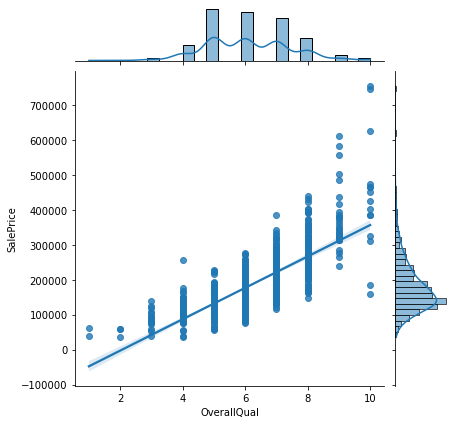

In [11]:
sns.jointplot(x = "OverallQual", y = "SalePrice", data = train, kind = "reg");

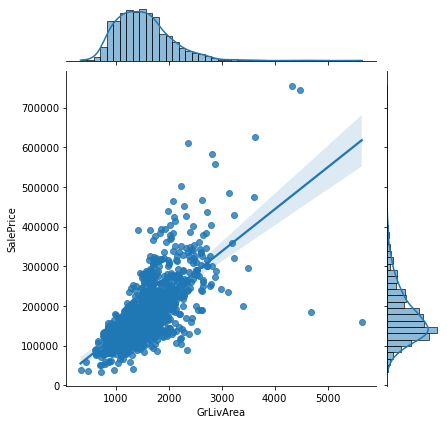

In [12]:
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = train, kind = "reg");

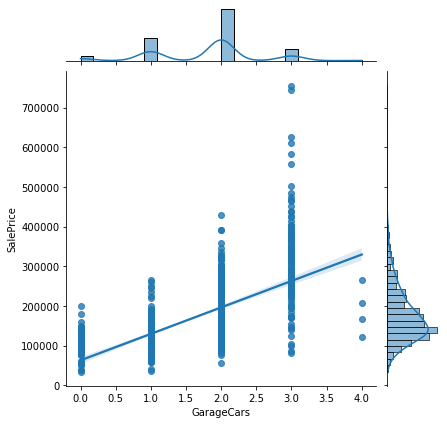

In [13]:
sns.jointplot(x = "GarageCars", y = "SalePrice", data = train, kind = "reg");

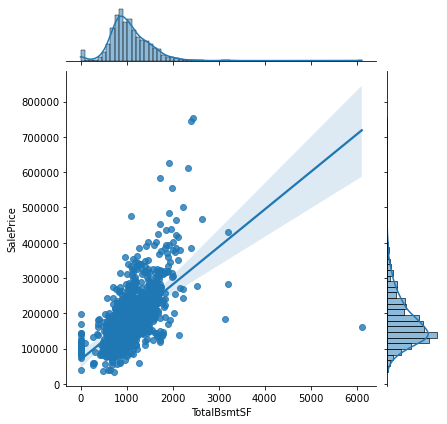

In [14]:
sns.jointplot(x = "TotalBsmtSF", y = "SalePrice", data = train, kind = "reg");

In [15]:
#Modeling
#linear regression model with 2 features
lm  = LinearRegression()

In [16]:
X = pd.DataFrame(np.c_[train['GrLivArea'], train['OverallQual']], columns = ['GrLivArea','OverallQual'])
y = train[["SalePrice"]]

In [17]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,
random_state=5)

In [18]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [19]:
y_pred[0:5]

array([[119016.3170204 ],
       [258630.77564963],
       [152076.20805536],
       [118783.50088635],
       [228292.74543413]])

In [21]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))



MAE = 29041.935
R^2 = 0.63010
MSE = 2401354448.363


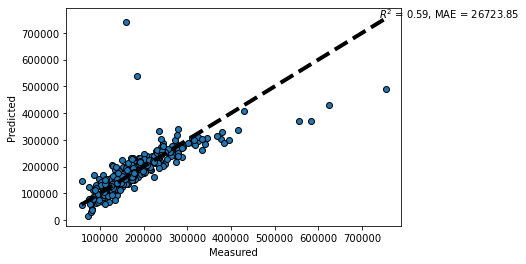

In [34]:

#GRAPH BTWN PREDICTED(Y-AXIS) AND MEASURED(X-AXIS)
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [26]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1168.0,181477.005993,79105.586863,34900.0,130375.0,163995.0,215000.0,755000.0


In [27]:
#linear regression model with 5 features
df=train.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y = train[["SalePrice"]]
df

,GrLivArea,OverallQual,GarageArea,TotalBsmtSF,GarageCars
0,958,6,440,1078,2
1,2217,8,621,2217,2
2,2013,7,455,1117,2
3,1844,6,546,1844,2
4,1602,6,529,1602,2
...,...,...,...,...,...
1163,900,5,280,882,1
1164,1126,4,520,0,2
1165,1456,6,440,855,2
1166,1317,4,250,649,1


In [28]:
x_train, x_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.3,
random_state=5)

In [29]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [30]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))


MAE = 26723.850
R^2 = 0.58871
MSE = 2670070531.870


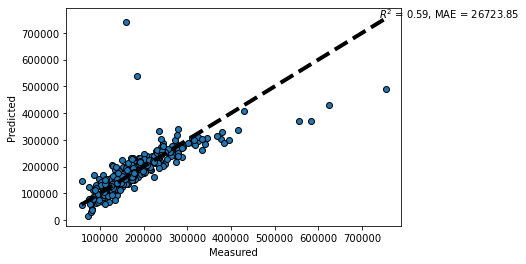

In [31]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [32]:
#Data exploring
final=test.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y_pred_test= model.predict(final)
submission  = pd.DataFrame()
submission['Id']=test['Id']
submission["SalePrice"]=y_pred_test
submission.info()
submission.to_csv('submission.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         292 non-null    int64  
 1   SalePrice  292 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.7 KB


In [33]:
submission.head()

,Id,SalePrice
0,337,316824.751212
1,1018,226925.144770
2,929,269846.092259
3,1148,173912.464359
4,1227,207038.211886
